In [1]:
import os

object_names = [
    "Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август",
    "Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль",
    "Строительная площадка_18-001_Август",
    "Строительная площадка_18-001_Июль"
]

base_dir = "."

object_paths = {}

for obj_name in object_names:
    obj_dir = os.path.join(base_dir, obj_name)
    json_path = os.path.join(base_dir, f"{obj_name}.json")
    xlsx_path = os.path.join(base_dir, f"{obj_name}.xlsx")
    zip_path = os.path.join(base_dir, f"{obj_name}.zip")

    object_paths[obj_name] = {
        "json": json_path,
        "xlsx": xlsx_path,
        "zip": zip_path
    }

print(object_paths)

{'Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август': {'json': './Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.json', 'xlsx': './Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.xlsx', 'zip': './Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.zip'}, 'Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль': {'json': './Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль.json', 'xlsx': './Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль.xlsx', 'zip': './Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль.zip'}, 'Строительная площадка_18-001_Август': {'json': './Строительная площадка_18-001_Август.json', 'xlsx': './Строительная площадка_18-001_Август.xlsx', 'zip': './Строительная площадка_18-001_Август.zip'}, 'Строительная площадка_18-001_Июль': {'json': './Стр

In [6]:
import zipfile
import json
import pandas as pd
import os

loaded_data = {}

for obj_name, paths in object_paths.items():
    print(f"Processing object: {obj_name}")
    print(f"  JSON path: {paths['json']}")
    print(f"  XLSX path: {paths['xlsx']}")
    print(f"  ZIP path: {paths['zip']}")

    # Create a directory to extract the zip file into
    extract_dir = os.path.join("/tmp", obj_name)
    os.makedirs(extract_dir, exist_ok=True)

    # Unzip the file
    if os.path.exists(paths['zip']):
        with zipfile.ZipFile(paths['zip'], 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"  Unzipped to: {extract_dir}")
    else:
        print(f"  ZIP file not found: {paths['zip']}")

    # Load JSON data
    json_data = None
    if os.path.exists(paths['json']):
        with open(paths['json'], 'r') as f:
            json_data = json.load(f)
        print(f"  Loaded JSON from: {paths['json']}")
    else:
        print(f"  JSON file not found: {paths['json']}")

    # Load XLSX data into a pandas DataFrame
    xlsx_data = None
    if os.path.exists(paths['xlsx']):
        try:
            xlsx_data = pd.read_excel(paths['xlsx'])
            print(f"  Loaded XLSX from: {paths['xlsx']}")
        except Exception as e:
            print(f"  Error loading XLSX from {paths['xlsx']}: {e}")
    else:
        print(f"  XLSX file not found: {paths['xlsx']}")

    # Add the 'Полный путь к файлу' column to the DataFrame if it was loaded successfully
    if xlsx_data is not None and 'Имя файла' in xlsx_data.columns:
         xlsx_data['Полный путь к файлу'] = os.path.join(extract_dir, obj_name, '') + xlsx_data['Имя файла']


    loaded_data[obj_name] = {
        "json": json_data,
        "xlsx": xlsx_data,
        "extracted_files_dir": extract_dir # Store the extraction directory path
    }



Processing object: Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август
  JSON path: ./Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.json
  XLSX path: ./Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.xlsx
  ZIP path: ./Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.zip
  Unzipped to: /tmp/Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август
  Loaded JSON from: ./Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.json
  Loaded XLSX from: ./Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август.xlsx
Processing object: Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль
  JSON path: ./Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль.json
  XLSX path: ./Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль.x

In [7]:
for obj_name, paths in object_paths.items():
    df = loaded_data[obj_name]["xlsx"]
    print(obj_name, df.shape)


Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август (11898, 9)
Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль (8635, 9)
Строительная площадка_18-001_Август (15000, 9)
Строительная площадка_18-001_Июль (15000, 9)


In [8]:
import numpy as np
import pandas as pd

# --- Константы ---
# "Центр" для дистанций (Кремль)
CTR_LAT, CTR_LON = 55.751244, 37.618423

# Очень широкий бокс по Москве и МО (не режем агрессивно)
LAT_WIDE = (55.3, 56.0)
LON_WIDE = (37.2, 38.0)

# Более "ядровой" бокс (внутренняя Москва) — для справки
LAT_CORE = (55.3, 56.0)
LON_CORE = (37.2, 38.0)

# Круговая маска от центра (альтернатива/дополнение к боксу)
# <70 км — Москва и ближнее Подмосковье; подстрой при необходимости
RADIUS_KM = 70.0

def haversine_m(lat1, lon1, lat2, lon2):
    R = 6371000.0
    lat1 = np.radians(lat1); lon1 = np.radians(lon1)
    lat2 = np.radians(lat2); lon2 = np.radians(lon2)
    dlat = lat2 - lat1; dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    return R * (2*np.arcsin(np.sqrt(a)))

def add_coord_flags(df, lat_col='latitude', lon_col='longitude'):
    dfx = df.copy()
    # валидность чисел
    dfx['coord_notna'] = dfx[lat_col].notna() & dfx[lon_col].notna()

    # широкие/ядровые боксы
    dfx['in_wide_box'] = (
        dfx[lat_col].between(*LAT_WIDE) &
        dfx[lon_col].between(*LON_WIDE)
    )
    dfx['in_core_box'] = (
        dfx[lat_col].between(*LAT_CORE) &
        dfx[lon_col].between(*LON_CORE)
    )

    # дистанция от центра
    dfx['dist_m_from_center'] = haversine_m(dfx[lat_col], dfx[lon_col], CTR_LAT, CTR_LON)
    dfx['in_radius'] = (dfx['dist_m_from_center'] <= RADIUS_KM*1000)

    # итоговая маска "Москва ок" (логика: валидные числа И (в широком боксе ИЛИ в радиусе))
    dfx['moscow_ok'] = dfx['coord_notna'] & (dfx['in_wide_box'] | dfx['in_radius'])

    return dfx

def summarize_coords(dfx, name, lat_col='latitude', lon_col='longitude'):
    n = len(dfx)
    n_notna = int(dfx['coord_notna'].sum())
    n_ok = int(dfx['moscow_ok'].sum())
    n_core = int(dfx['in_core_box'].sum())

    # базовые статистики по валидным координатам
    valid = dfx[dfx['coord_notna']]
    if len(valid):
        lat_min, lat_max = valid[lat_col].min(), valid[lat_col].max()
        lon_min, lon_max = valid[lon_col].min(), valid[lon_col].max()
        dists = valid['dist_m_from_center'].values
        stats = {
            'dist_m_median': float(np.median(dists)),
            'dist_m_p90': float(np.percentile(dists, 90)),
            'dist_m_max': float(np.max(dists)),
        }
    else:
        lat_min=lat_max=lon_min=lon_max=np.nan
        stats = {'dist_m_median':np.nan,'dist_m_p90':np.nan,'dist_m_max':np.nan}

    print(f"\n== {name} ==")
    print(f"Всего строк: {n}")
    print(f"Координаты notna: {n_notna} ({n_notna/n*100:.1f}%)")
    print(f"moscow_ok: {n_ok} ({n_ok/n*100:.1f}%) | in_core_box: {n_core} ({n_core/n*100:.1f}%)")
    print(f"Lat range: [{lat_min:.5f}, {lat_max:.5f}] | Lon range: [{lon_min:.5f}, {lon_max:.5f}]")
    print(f"Dist from center (m): median={stats['dist_m_median']:.1f}, p90={stats['dist_m_p90']:.1f}, max={stats['dist_m_max']:.1f}")
    return stats

# ---- прогон по всем наборам ----
coord_flags = {}  # сохраним обогащенные DataFrame при желании использовать дальше

for obj_name, bundle in loaded_data.items():
    df = bundle.get("xlsx")
    if df is None or ('latitude' not in df.columns) or ('longitude' not in df.columns):
        print(f"\n== {obj_name} ==\nНет координатных колонок.")
        continue

    dfx = add_coord_flags(df, 'latitude', 'longitude')
    coord_flags[obj_name] = dfx  # НЕ удаляем, просто добавили признаки

    _ = summarize_coords(dfx, obj_name, 'latitude', 'longitude')

# (опционально) Топ-камеры по доле выбросов (вне moscow_ok)
for obj_name, dfx in coord_flags.items():
    if 'camera' not in dfx.columns:
        continue
    tmp = dfx.copy()
    grp = tmp.groupby('camera').agg(
        n=('camera','size'),
        bad=('moscow_ok', lambda s: (~s).sum())
    )
    grp['bad_pct'] = grp['bad'] / grp['n'] * 100
    top = grp.sort_values('bad_pct', ascending=False).head(10)
    print(f"\n== Топ-камер по выбросам (вне moscow_ok) — {obj_name} ==")
    print(top.to_string(formatters={'bad_pct':lambda v: f"{v:.1f}%"}))



== Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август ==
Всего строк: 11898
Координаты notna: 11898 (100.0%)
moscow_ok: 11456 (96.3%) | in_core_box: 11203 (94.2%)
Lat range: [25.61625, 65.20046] | Lon range: [27.07118, 82.65228]
Dist from center (m): median=10418.4, p90=27544.9, max=3443066.5

== Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль ==
Всего строк: 8635
Координаты notna: 8635 (100.0%)
moscow_ok: 8300 (96.1%) | in_core_box: 8114 (94.0%)
Lat range: [43.54107, 58.69785] | Lon range: [22.96079, 82.65218]
Dist from center (m): median=10872.3, p90=27690.3, max=2795683.4

== Строительная площадка_18-001_Август ==
Всего строк: 15000
Координаты notna: 15000 (100.0%)
moscow_ok: 14596 (97.3%) | in_core_box: 14335 (95.6%)
Lat range: [41.19006, 65.05930] | Lon range: [25.14838, 82.65452]
Dist from center (m): median=10933.1, p90=27733.8, max=2795883.8

== Строительная площадка_18-001_Июль ==
Всего строк: 15000
Координаты notna: 

In [9]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 86.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 58.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 141.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [matplotlib]6 [matplotlib]


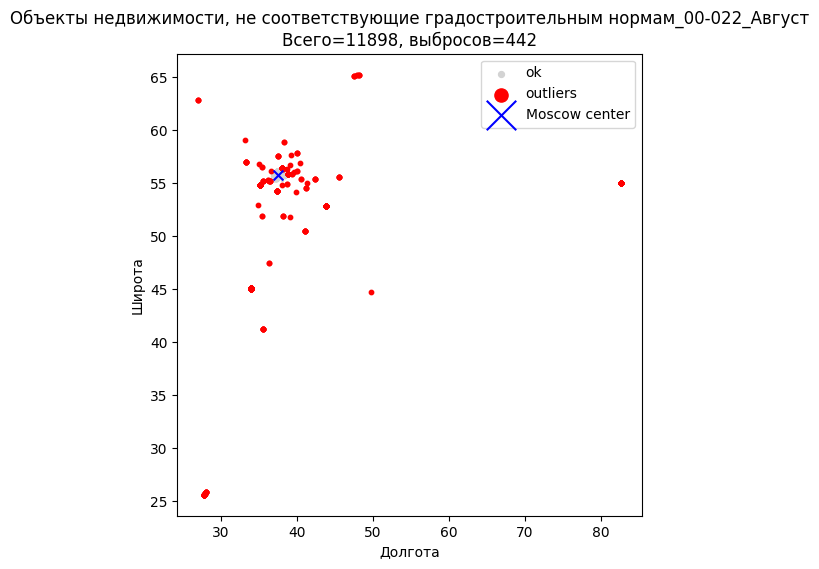

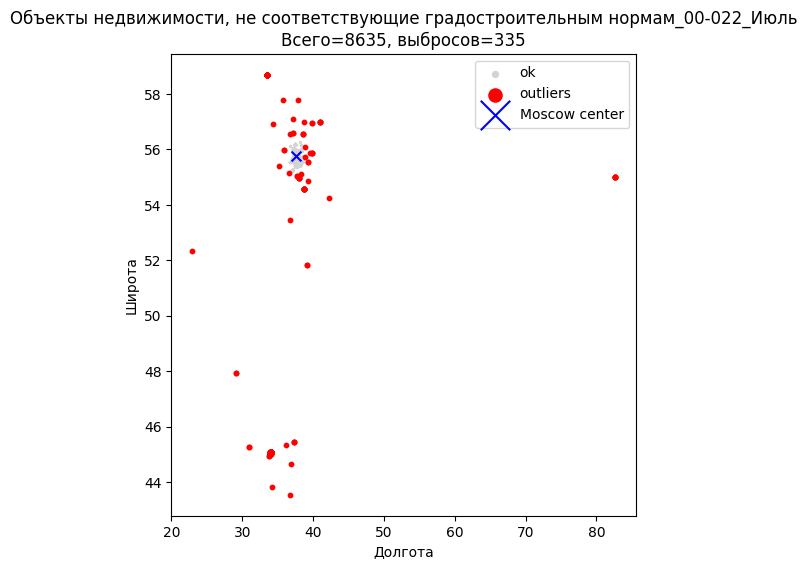

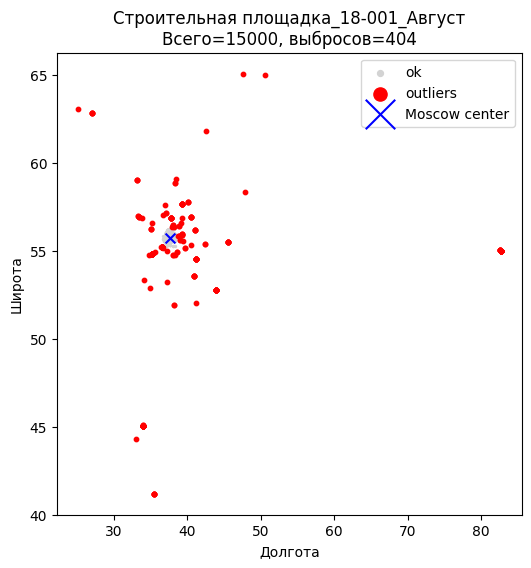

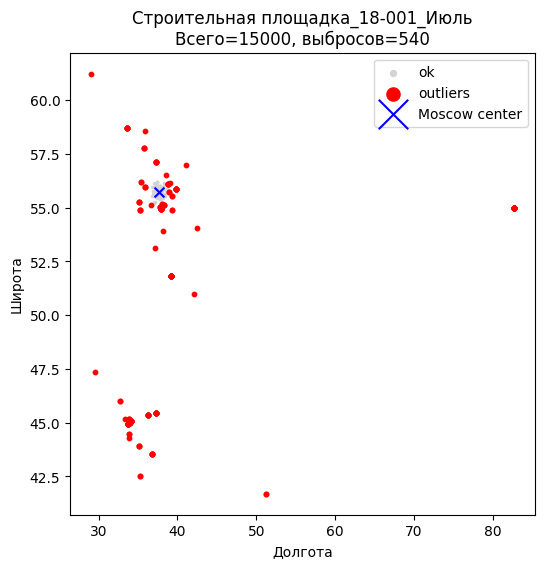

In [10]:
import matplotlib.pyplot as plt

for obj_name, dfx in coord_flags.items():
    if dfx.empty or 'latitude' not in dfx.columns or 'longitude' not in dfx.columns:
        continue

    fig, ax = plt.subplots(figsize=(6,6))
    ok = dfx[dfx['moscow_ok']]
    bad = dfx[~dfx['moscow_ok']]

    # Все нормальные точки — серым
    ax.scatter(ok['longitude'], ok['latitude'], s=2, c='lightgray', label='ok')

    # Выбросы — красным
    if not bad.empty:
        ax.scatter(bad['longitude'], bad['latitude'], s=10, c='red', label='outliers')

    # Центр Москвы (Кремль)
    ax.scatter([CTR_LON], [CTR_LAT], c='blue', s=50, marker='x', label='Moscow center')

    ax.set_title(f"{obj_name}\nВсего={len(dfx)}, выбросов={len(bad)}")
    ax.set_xlabel("Долгота")
    ax.set_ylabel("Широта")
    ax.legend(markerscale=3)
    plt.show()


In [11]:
import os
import pandas as pd
from datetime import datetime

# === 1) Папка для сохранения «очищенных» версий ===
SAVE_DIR = "/tmp/cleaned"
os.makedirs(SAVE_DIR, exist_ok=True)
ts = datetime.now().strftime("%Y%m%d_%H%M%S")

# === 2) Удаляем выбросы и собираем сводку ===
cleaned_data = {}
summary_rows = []

for obj_name, dfx in coord_flags.items():
    # защитные проверки
    if dfx is None or dfx.empty or 'moscow_ok' not in dfx.columns:
        print(f"[SKIP] {obj_name}: нет данных/флагов moscow_ok")
        continue

    n_all = len(dfx)
    n_bad = int((~dfx['moscow_ok']).sum())
    n_good = n_all - n_bad

    # не только фильтр, но и уберём явные NaN координаты
    keep_mask = dfx['moscow_ok'] & dfx['coord_notna']
    dfx_clean = dfx.loc[keep_mask].copy()

    # (опционально) простая дедупликация: по ['camera','Имя файла'] если есть
    dedup_keys = [c for c in ['camera','Имя файла'] if c in dfx_clean.columns]
    if dedup_keys:
        before = len(dfx_clean)
        dfx_clean = dfx_clean.drop_duplicates(subset=dedup_keys, keep='first')
        after = len(dfx_clean)
        dedup_removed = before - after
    else:
        dedup_removed = 0

    # Обновим основной контейнер loaded_data → заменить xlsx на очищенный
    # (сохраним только исходные колонки + добавим полезные признаки)
    base_df = loaded_data[obj_name]['xlsx']
    if base_df is not None:
        # переносим флаги обратно только для оставшихся строк (по индексу совпадает)
        # чтобы не потерять столбцы, делаем merge по уникальному ключу, если есть
        # 1) если есть 'Имя файла' — используем его как ключ
        if 'Имя файла' in base_df.columns and 'Имя файла' in dfx_clean.columns:
            to_save = base_df.merge(
                dfx_clean[['Имя файла','dist_m_from_center','in_core_box']],
                on='Имя файла', how='inner'
            )
        else:
            # fallback: по индексу пересечения
            to_save = base_df.loc[dfx_clean.index].copy()
            # приклеим метрики, если индексы совпадают
            to_save['dist_m_from_center'] = dfx_clean['dist_m_from_center']
            if 'in_core_box' in dfx_clean.columns:
                to_save['in_core_box'] = dfx_clean['in_core_box']
    else:
        to_save = dfx_clean.copy()

    loaded_data[obj_name]['xlsx'] = to_save
    cleaned_data[obj_name] = to_save

    # === 3) Сохранить на диск (CSV + Parquet) ===
    csv_path = os.path.join(SAVE_DIR, f"{obj_name}__clean_{ts}.csv")
    pq_path  = os.path.join(SAVE_DIR, f"{obj_name}__clean_{ts}.parquet")
    try:
        to_save.to_csv(csv_path, index=False)
    except Exception as e:
        print(f"[WARN] CSV save failed for {obj_name}: {e}")
    try:
        to_save.to_parquet(pq_path, index=False)
    except Exception as e:
        print(f"[WARN] Parquet save failed for {obj_name}: {e}")

    summary_rows.append({
        "dataset": obj_name,
        "n_all": n_all,
        "n_good": n_good - dedup_removed,
        "n_outliers_removed": n_bad,
        "n_dedup_removed": dedup_removed
    })

# === 4) Сводная таблица по очистке ===
clean_summary = pd.DataFrame(summary_rows).sort_values("dataset").reset_index(drop=True)
print("\n=== Итог очистки ===")
display(clean_summary)

print(f"\nФайлы сохранены в: {SAVE_DIR}")


[WARN] Parquet save failed for Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.
[WARN] Parquet save failed for Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Июль: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 -

,dataset,n_all,n_good,n_outliers_removed,n_dedup_removed
0,"Объекты недвижимости, не соответствующие градо...",11898,11456,442,0
1,"Объекты недвижимости, не соответствующие градо...",8635,8300,335,0
2,Строительная площадка_18-001_Август,15000,14596,404,0
3,Строительная площадка_18-001_Июль,15000,14460,540,0



Файлы сохранены в: /tmp/cleaned


In [12]:
cleaned_data

{'Объекты недвижимости, не соответствующие градостроительным нормам_00-022_Август':                                       Имя файла  Гиперссылка  \
 0      b19788e8-ff7e-442a-9e3c-c9eefbcb42dc.jpg          NaN   
 1      15b8bee9-54a1-4b56-9188-cdf0206833f0.jpg          NaN   
 2      25073a6e-d418-44b3-9d00-77db20f635b4.jpg          NaN   
 3      086dfadf-9cf7-4e35-888b-02fb5a3b77c1.jpg          NaN   
 4      f9cc04d6-ece4-4f09-bdf9-229b1f743936.jpg          NaN   
 ...                                         ...          ...   
 11451  2956dc4b-8b1e-4598-8446-6fff11262cb0.jpg          NaN   
 11452  32aa8167-4559-4a99-9efc-7b4793c04b8c.jpg          NaN   
 11453  747bfee5-5ec7-42cc-bb46-1bed5b744cc9.jpg          NaN   
 11454  9cebfa1b-bf67-4401-ab9f-2cf739f42a0d.jpg          NaN   
 11455  5737d2d6-3a2b-436a-9f79-94b632fb0944.jpg          NaN   
 
                                      camera  latitude  longitude  TP  FP  \
 0      fb40ed24-21ef-458a-a239-038ab19932cc  55.57043   3

In [13]:
# === Merge all cleaned datasets into one CSV with columns: image_path, lat, lon ===
import os
import re
import math
import glob
import pandas as pd
from pathlib import Path
from datetime import datetime

# ---------- CONFIG ----------
# 1) Если у тебя уже есть словарь cleaned_data = {name: df, ...}  -> оставь CLEANED_DICT=None и передай его в merge_all(cleaned_dict=cleaned_data)
# 2) Если хочешь собрать из файлов, укажи папку с CSV после твоей очистки:
FILES_DIR = "/tmp/cleaned"           # папка, где лежат твои *_clean_*.csv
FILES_GLOB = "*__clean_*.csv"        # маска файлов
OUT_CSV    = "/tmp/geo/frames.csv"   # куда сохранить объединённый CSV
CHECK_FILE_EXISTS = False            # если True — оставим только реально существующие файлы
FILTER_MOSCOW_BBOX = True            # ограничить координаты рамкой Москвы/МО (можно выключить)
MOSCOW_BBOX = dict(lat_min=54.5, lat_max=56.8, lon_min=35.0, lon_max=41.5)  # примерно МО

Path(OUT_CSV).parent.mkdir(parents=True, exist_ok=True)

# ---------- UTILS ----------
def _first_existing_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

def _to_float_safe(x):
    try:
        return float(str(x).replace(",", "."))
    except Exception:
        return math.nan

def _norm_path(p):
    if pd.isna(p):
        return None
    p = str(p).strip().strip('"').strip("'")
    # уберём двойные слэши и ~
    p = os.path.expanduser(p)
    p = os.path.normpath(p)
    return p

def _pick_path(df):
    """Выбираем лучший столбец с путём к файлу"""
    # приоритет: Полный путь -> image_path -> Гиперссылка -> path -> file / Имя файла (как fallback)
    path_col = _first_existing_col(df, [
        "Полный путь к файлу", "image_path", "Гиперссылка", "path", "full_path"
    ])
    if path_col is None:
        # иногда есть только имя файла; вернём этот столбец, но предупредим
        path_col = _first_existing_col(df, ["Имя файла", "filename", "file"])
    return path_col

def _pick_latlon(df):
    lat_col = _first_existing_col(df, ["latitude", "lat", "широта", "Широта"])
    lon_col = _first_existing_col(df, ["longitude", "lon", "долгота", "Долгота"])
    return lat_col, lon_col

def _filter_bbox(df, bbox):
    m = (
        (df["lat"] >= bbox["lat_min"]) & (df["lat"] <= bbox["lat_max"]) &
        (df["lon"] >= bbox["lon_min"]) & (df["lon"] <= bbox["lon_max"])
    )
    return df.loc[m].copy()

def _summarize(df, title="summary"):
    n = len(df)
    n_nan = int(df[["lat","lon"]].isna().any(axis=1).sum())
    print(f"[{title}] rows={n} | NaN lat/lon={n_nan} | unique paths={df['image_path'].nunique()}")

# ---------- CORE ----------
def merge_all(cleaned_dict=None, files_dir=FILES_DIR, files_glob=FILES_GLOB, 
              out_csv=OUT_CSV, check_exists=CHECK_FILE_EXISTS, filter_bbox=FILTER_MOSCOW_BBOX):
    rows = []
    src_count = 0

    if cleaned_dict is not None:
        items = list(cleaned_dict.items())
        print(f"[merge] from dict: {len(items)} datasets")
        for name, df in items:
            if df is None or df.empty:
                continue
            src_count += 1
            path_col = _pick_path(df)
            lat_col, lon_col = _pick_latlon(df)
            if path_col is None or lat_col is None or lon_col is None:
                print(f"[WARN] {name}: missing required columns")
                continue
            tmp = pd.DataFrame({
                "image_path": df[path_col].map(_norm_path),
                "lat": df[lat_col].map(_to_float_safe),
                "lon": df[lon_col].map(_to_float_safe),
                "_dataset": name
            })
            rows.append(tmp)
    else:
        # читать CSV с диска
        files = sorted(glob.glob(str(Path(files_dir)/files_glob)))
        print(f"[merge] from files: found {len(files)} CSV in {files_dir}")
        for csv_path in files:
            try:
                df = pd.read_csv(csv_path)
            except Exception as e:
                print(f"[WARN] cannot read {csv_path}: {e}")
                continue
            src_count += 1
            name = Path(csv_path).stem
            path_col = _pick_path(df)
            lat_col, lon_col = _pick_latlon(df)
            if path_col is None or lat_col is None or lon_col is None:
                print(f"[WARN] {name}: missing required columns")
                continue
            tmp = pd.DataFrame({
                "image_path": df[path_col].map(_norm_path),
                "lat": df[lat_col].map(_to_float_safe),
                "lon": df[lon_col].map(_to_float_safe),
                "_dataset": name
            })
            rows.append(tmp)

    assert len(rows)>0, "Не найдено ни одной таблицы с нужными колонками"
    data = pd.concat(rows, ignore_index=True)

    # базовая чистка
    _summarize(data, "raw concat")
    data = data.dropna(subset=["image_path", "lat", "lon"]).copy()

    if check_exists:
        exists_mask = data["image_path"].map(lambda p: Path(p).exists())
        data = data.loc[exists_mask].copy()
        print(f"[fs] kept only existing files: {exists_mask.sum()}/{len(exists_mask)}")

    # рамка Москвы/МО
    if filter_bbox:
        before = len(data)
        data = _filter_bbox(data, MOSCOW_BBOX)
        print(f"[bbox] Moscow filter: {before} -> {len(data)}")

    # дубликаты по пути (сохраняем первую встречу)
    before = len(data)
    data = data.drop_duplicates(subset=["image_path"]).reset_index(drop=True)
    print(f"[dedup] by image_path: {before} -> {len(data)}")

    # финальная валидация диапазонов
    def in_valid_range(lat, lon):
        return -90 <= lat <= 90 and -180 <= lon <= 180
    data = data.loc[data.apply(lambda r: in_valid_range(r["lat"], r["lon"]), axis=1)].reset_index(drop=True)

    # сохранить
    out_csv = Path(out_csv)
    out_csv.parent.mkdir(parents=True, exist_ok=True)
    data[["image_path", "lat", "lon"]].to_csv(out_csv, index=False)
    print(f"[save] merged CSV -> {out_csv} (rows={len(data)})")

    # мини-проверка на указанном примере
    probe_path = "/tmp/Строительная площадка_18-001_Июль/Строительная площадка_18-001_Июль/67071564-1155-435f-bc7a-2ede18d45a0d.jpg"
    if (data["image_path"] == os.path.normpath(probe_path)).any():
        probe = data.loc[data["image_path"] == os.path.normpath(probe_path)]
        print("[probe] нашёл строку примера:")
        display(probe)
    else:
        print("[probe] строка примера не найдена (проверь путь/регист/расширение)")

    _summarize(data, "final")
    return data

# run
merged = merge_all(cleaned_dict=cleaned_data, out_csv=OUT_CSV)


[merge] from dict: 4 datasets
[raw concat] rows=48812 | NaN lat/lon=0 | unique paths=48812
[bbox] Moscow filter: 48812 -> 48812
[dedup] by image_path: 48812 -> 48812
[save] merged CSV -> /tmp/geo/frames.csv (rows=48812)
[probe] нашёл строку примера:


,image_path,lat,lon,_dataset
34819,/tmp/Строительная площадка_18-001_Июль/Строите...,55.74976,37.82994,Строительная площадка_18-001_Июль


[final] rows=48812 | NaN lat/lon=0 | unique paths=48812


In [14]:
merged.head()

,image_path,lat,lon,_dataset
0,"/tmp/Объекты недвижимости, не соответствующие ...",55.57043,37.94224,"Объекты недвижимости, не соответствующие градо..."
1,"/tmp/Объекты недвижимости, не соответствующие ...",55.97218,37.44981,"Объекты недвижимости, не соответствующие градо..."
2,"/tmp/Объекты недвижимости, не соответствующие ...",55.97218,37.44981,"Объекты недвижимости, не соответствующие градо..."
3,"/tmp/Объекты недвижимости, не соответствующие ...",55.97218,37.44981,"Объекты недвижимости, не соответствующие градо..."
4,"/tmp/Объекты недвижимости, не соответствующие ...",55.97218,37.44981,"Объекты недвижимости, не соответствующие градо..."


In [15]:

# == Dataset preparation for GPS regression ==
# This cell defines a helper function to convert a CSV file with columns
# (image_path, lat, lon) into the directory structure expected by the
# GPS regression model.  It copies or hard-links the original images
# into `out_dir/images` and writes a JSON file `exif_data.json` that
# contains the latitude and longitude for each image.  The resulting
# directory can be passed directly to the training function below.

import pandas as pd
import shutil
import json
from pathlib import Path
from tqdm.auto import tqdm


def build_dataset(csv_path: str, out_dir: str) -> None:
    """
    Build a dataset directory from a CSV.  The CSV must contain
    columns `image_path`, `lat`, and `lon`.  Images referenced in
    `image_path` are copied (or hard-linked) into `out_dir/images` and
    a JSON file `exif_data.json` is generated in `out_dir`.

    Example usage::

        build_dataset('data_msk/frames.csv', 'data')
    """
    out_dir = Path(out_dir)
    img_dir = out_dir / 'images'
    img_dir.mkdir(parents=True, exist_ok=True)
    df = pd.read_csv(csv_path)
    required = {"image_path", "lat", "lon"}
    if not required.issubset(df.columns):
        raise ValueError(f"CSV must contain columns {required}")
    records = []
    for _, row in tqdm(df.iterrows(), total=len(df), desc='copy images'):
        src = Path(str(row['image_path']))
        if not src.exists():
            print(f'[warn] missing: {src}')
            continue
        # unique filename to avoid collisions
        unique_name = f"{src.stem}_{abs(hash(str(src))) % 10**8}{src.suffix.lower()}"
        dst = img_dir / unique_name
        try:
            # try hardlink first
            try:
                dst.hardlink_to(src)
            except Exception:
                shutil.copy2(src, dst)
        except Exception as e:
            print(f'[copy] {src} -> {dst} fail: {e}')
            continue
        records.append({
            'filename': unique_name,
            'gps_latitude': float(row['lat']),
            'gps_longitude': float(row['lon']),
        })
    # write JSON and dummy CSV for compatibility
    (out_dir / 'exif_data.json').write_text(json.dumps(records, ensure_ascii=False, indent=2))
    (out_dir / 'location_data.csv').write_text('filename,lat,lon')
    print(f'[ok] Dataset ready in {out_dir}')

build_dataset('/tmp/geo/frames.csv', '/tmp/data/')

copy images:   0%|          | 0/48812 [00:00<?, ?it/s]

[ok] Dataset ready in /tmp/data


In [16]:

DATA_DIR = Path("/tmp/data")
EXIF_JSON = DATA_DIR / "exif_data.json"
IM_DIR = DATA_DIR / "images"
OUT_CSV = DATA_DIR / "location_data.csv"

# 1) прочитать json
if not EXIF_JSON.exists():
    raise FileNotFoundError(f"{EXIF_JSON} not found. Создайте exif_data.json сначала.")
items = json.loads(EXIF_JSON.read_text(encoding="utf-8"))

# 2) собрать dataframe
rows = []
for it in items:
    fn = it.get("filename")
    lat = it.get("gps_latitude") or it.get("lat") or it.get("latitude")
    lon = it.get("gps_longitude") or it.get("lon") or it.get("longitude")
    path = IM_DIR / fn
    rows.append({"filename": fn, "image_path": str(path), "lat": lat, "lon": lon})

df = pd.DataFrame(rows)

# 3) аналитика / проверки
df['file_exists'] = df['image_path'].map(lambda p: Path(p).exists())
num_exist = int(df['file_exists'].sum())
print(f"Всего записей в exif_data.json: {len(df)}; файлов найдено: {num_exist}")

# 4) сохранить CSV (убираем несуществующие, если нужно - включите keep_all=True)
keep_all = False
if not keep_all:
    df = df[df['file_exists']].copy()
df = df[['image_path','lat','lon','filename']]
df.to_csv(OUT_CSV, index=False)
print(f"location_data.csv создан: {OUT_CSV} (строк: {len(df)})")

# 5) краткий вывод несколько строк
display(df.head(10))

Всего записей в exif_data.json: 48812; файлов найдено: 48812
location_data.csv создан: /tmp/data/location_data.csv (строк: 48812)


,image_path,lat,lon,filename
0,/tmp/data/images/b19788e8-ff7e-442a-9e3c-c9eef...,55.57043,37.94224,b19788e8-ff7e-442a-9e3c-c9eefbcb42dc_17780233.jpg
1,/tmp/data/images/15b8bee9-54a1-4b56-9188-cdf02...,55.97218,37.44981,15b8bee9-54a1-4b56-9188-cdf0206833f0_79548012.jpg
2,/tmp/data/images/25073a6e-d418-44b3-9d00-77db2...,55.97218,37.44981,25073a6e-d418-44b3-9d00-77db20f635b4_1991062.jpg
3,/tmp/data/images/086dfadf-9cf7-4e35-888b-02fb5...,55.97218,37.44981,086dfadf-9cf7-4e35-888b-02fb5a3b77c1_25008850.jpg
4,/tmp/data/images/f9cc04d6-ece4-4f09-bdf9-229b1...,55.97218,37.44981,f9cc04d6-ece4-4f09-bdf9-229b1f743936_12930153.jpg
5,/tmp/data/images/b9de70d9-2d31-4b7a-aff0-4b419...,55.97218,37.44981,b9de70d9-2d31-4b7a-aff0-4b41971de5b4_66822180.jpg
6,/tmp/data/images/a774322d-f93d-41d4-aa78-464ad...,55.98930,37.83598,a774322d-f93d-41d4-aa78-464add29d9f2_47845805.jpg
7,/tmp/data/images/cf9f1c45-2bae-4f27-9d12-6e94e...,55.83910,37.65220,cf9f1c45-2bae-4f27-9d12-6e94e0bc2268_55253170.jpg
8,/tmp/data/images/fa17ee7f-cc2d-474b-addd-b3497...,55.97218,37.44981,fa17ee7f-cc2d-474b-addd-b3497ea58a2d_17630126.jpg
9,/tmp/data/images/d397504e-a32f-4b6c-b1da-f6fec...,55.97218,37.44981,d397504e-a32f-4b6c-b1da-f6fecc1c9381_8711098.jpg


In [22]:

# == Training GPS regression model ==
# This cell defines a lightweight GPS regression model based on
# EfficientNet-B0 and provides a function to train it on a custom
# dataset.  The function computes latitude/longitude bounds from the
# dataset, splits it into training/validation sets, and logs the
# training progress.  It saves checkpoints in the specified
# output directory.

import math
import time
import json
import numpy as np
from pathlib import Path
from PIL import Image
from tqdm.auto import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torch.cuda.amp import autocast, GradScaler
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms, models
from torchvision.models import EfficientNet_B0_Weights

# Utility to compute bounds from exif_data.json
def compute_bounds_from_json(json_path: str, pad: float = 0.05):
    data = json.loads(Path(json_path).read_text())
    lats = [d['gps_latitude'] for d in data]
    lons = [d['gps_longitude'] for d in data]
    lat_min, lat_max = float(np.min(lats)), float(np.max(lats))
    lon_min, lon_max = float(np.min(lons)), float(np.max(lons))
    dlat = (lat_max - lat_min) * pad
    dlon = (lon_max - lon_min) * pad
    return lat_min - dlat, lat_max + dlat, lon_min - dlon, lon_max + dlon

# Dataset class
def make_dataset(data_dir: str, img_size: int, train: bool, bounds: tuple):
    """Return a PyTorch dataset for GPS regression."""
    image_dir = Path(data_dir) / 'images'
    json_path = Path(data_dir) / 'exif_data.json'
    items = json.loads(Path(json_path).read_text())
    samples = []
    for d in items:
        p = image_dir / d['filename']
        if p.exists():
            samples.append((str(p), float(d['gps_latitude']), float(d['gps_longitude'])))
    LAT_MIN, LAT_MAX, LON_MIN, LON_MAX = bounds
    if train:
        tf = transforms.Compose([
            transforms.Resize((img_size + 32, img_size + 32)),
            transforms.RandomCrop((img_size, img_size)),
            transforms.RandomHorizontalFlip(0.5),
            transforms.ColorJitter(0.2, 0.2, 0.2, 0.05),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ])
    else:
        tf = transforms.Compose([
            transforms.Resize((img_size, img_size)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
        ])

    class DS(Dataset):
        def __len__(self):
            return len(samples)
        def __getitem__(self, idx):
            path, lat, lon = samples[idx]
            img = Image.open(path).convert('RGB')
            x = tf(img)
            # normalize lat/lon to [-1,1]
            nlat = 2.0 * (lat - LAT_MIN) / (LAT_MAX - LAT_MIN) - 1.0
            nlon = 2.0 * (lon - LON_MIN) / (LON_MAX - LON_MIN) - 1.0
            return x, torch.tensor([nlat, nlon], dtype=torch.float32), torch.tensor([lat, lon], dtype=torch.float32), path
    return DS()

# Model definition
class SimpleGPSNet(nn.Module):
    def __init__(self):
        super().__init__()
        eff = models.efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
        in_features = eff.classifier[1].in_features
        eff.classifier = nn.Identity()
        self.backbone = eff
        self.head = nn.Sequential(
            nn.Linear(in_features, 512), nn.ReLU(inplace=True), nn.Dropout(0.25),
            nn.Linear(512, 128), nn.ReLU(inplace=True), nn.Linear(128, 2), nn.Tanh(),
        )
    def forward(self, x):
        f = self.backbone(x)
        return self.head(f)

# Loss function
class CoordMetersLoss(nn.Module):
    def __init__(self, lat0_rad):
        super().__init__()
        self.lat0_rad = lat0_rad
    def forward(self, pred_norm, targ_norm, bounds):
        LAT_MIN, LAT_MAX, LON_MIN, LON_MAX = bounds
        pred_lat = (pred_norm[:, 0] + 1) / 2 * (LAT_MAX - LAT_MIN) + LAT_MIN
        pred_lon = (pred_norm[:, 1] + 1) / 2 * (LON_MAX - LON_MIN) + LON_MIN
        targ_lat = (targ_norm[:, 0] + 1) / 2 * (LAT_MAX - LAT_MIN) + LAT_MIN
        targ_lon = (targ_norm[:, 1] + 1) / 2 * (LON_MAX - LON_MIN) + LON_MIN
        dlat = torch.abs(pred_lat - targ_lat) * 111_000.0
        dlon = torch.abs(pred_lon - targ_lon) * (111_000.0 * math.cos(self.lat0_rad))
        dist = torch.sqrt(dlat * dlat + dlon * dlon + 1e-9)
        return dist.mean()

# Training wrapper


def auto_num_workers(fraction=0.75):
    # 75% от доступных CPU — обычно оптимально
    try:
        ncpu = os.cpu_count() or 8
        return max(4, int(ncpu * fraction))
    except Exception:
        return 8

def load_checkpoint(path: Path, device):
    ckpt = torch.load(str(path), map_location=device)
    print(f"[ckpt] loaded {path} (epoch {ckpt.get('epoch')}, best {ckpt.get('best_val')})")
    return ckpt

def train_model(data_dir: str, out_dir: str, epochs: int = 30, bs: int = 32, img_size: int = 256, lr: float = 1e-4, val_split: float = 0.15, resume_from=True):
    """
    Train the SimpleGPSNet model on a prepared dataset.  Data must be
    created with build_dataset() and placed in `data_dir`.  Outputs
    checkpoints and TensorBoard logs to `out_dir`.
    """
    data_dir = Path(data_dir)
    bounds = compute_bounds_from_json(data_dir / 'exif_data.json', pad=0.05)
    LAT_MIN, LAT_MAX, LON_MIN, LON_MAX = bounds
    full_ds = make_dataset(data_dir, img_size, train=True, bounds=bounds)
    n = len(full_ds)
    n_val = max(1, int(n * val_split))
    n_tr = n - n_val
    tr_ds, va_ds = random_split(full_ds, [n_tr, n_val])
    # set evaluation mode for val dataset
    va_ds.dataset.train = False  # type: ignore
    NUM_WORKERS = auto_num_workers()
    PREFETCH = 4  # можно 6–8 при скоростном NVMe
    PIN = True
    tr_dl = DataLoader(tr_ds, batch_size=bs, shuffle=True, num_workers=NUM_WORKERS, pin_memory=PIN, persistent_workers=True, prefetch_factor=PREFETCH)
    va_dl = DataLoader(va_ds, batch_size=bs, shuffle=False, num_workers=max(2, NUM_WORKERS//2), pin_memory=PIN, persistent_workers=True, prefetch_factor=PREFETCH)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = SimpleGPSNet().to(device)
    opt = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    scaler = GradScaler(enabled=torch.cuda.is_available())
    loss_fn = CoordMetersLoss(lat0_rad=math.radians(0.5 * (LAT_MIN + LAT_MAX)))
    out_dir = Path(out_dir)
    out_dir.mkdir(parents=True, exist_ok=True)
    last_path = out_dir / 'last.pth'
    best_path = out_dir / 'best.pth'

    if resume_from:
        ckpt_path = Path(last_path)
        if ckpt_path.exists():
            ckpt = load_checkpoint(ckpt_path, device=device)
            # load model weights
            try:
                model.load_state_dict(ckpt['model'])
            except Exception as e:
                print("[ckpt] strict load failed, trying non-strict:", e)
                model.load_state_dict(ckpt['model'], strict=False)
            # optional load optimizer / scaler / epoch / best / bad
            if 'optimizer' in ckpt:
                try:
                    opt.load_state_dict(ckpt['optimizer'])
                    print("[ckpt] optimizer state loaded")
                except Exception as e:
                    print("[ckpt] optimizer load failed:", e)
            if 'scaler' in ckpt and isinstance(scaler, GradScaler):
                try:
                    scaler.load_state_dict(ckpt['scaler'])
                    print("[ckpt] scaler state loaded")
                except Exception as e:
                    print("[ckpt] scaler load failed:", e)
            start_epoch = ckpt.get('epoch', 0) + 1
            best = ckpt.get('best_val', best)
            bad = ckpt.get('bad', 0)
            print(f"[ckpt] resume from epoch {start_epoch}, best_val {best}, bad={bad}")
        else:
            print("[ckpt] resume path not found:", ckpt_path)
    writer = SummaryWriter(log_dir=str(out_dir / 'tb'))
    best = float('inf')
    best_path = out_dir / 'best.pth'
    last_path = out_dir / 'last.pth'
    patience = 8
    bad = 0
    for epoch in range(epochs):
        model.train()
        tot_tr, n_tr_samples = 0.0, 0
        for xb, y_norm, _, _ in tqdm(tr_dl, desc=f'train epoch {epoch}'):
            xb = xb.to(device, non_blocking=True)
            y_norm = y_norm.to(device, non_blocking=True)
            opt.zero_grad(set_to_none=True)
            with autocast(enabled=torch.cuda.is_available()):
                yp = model(xb)
                loss = loss_fn(yp, y_norm, bounds)
            scaler.scale(loss).backward()
            scaler.step(opt)
            scaler.update()
            bs_ = xb.size(0)
            tot_tr += loss.item() * bs_
            n_tr_samples += bs_
        tr_loss = tot_tr / max(1, n_tr_samples)
        # validation
        model.eval()
        tot_va, n_va_samples = 0.0, 0
        with torch.no_grad():
            for xb, y_norm, _, _ in va_dl:
                xb = xb.to(device, non_blocking=True)
                y_norm = y_norm.to(device, non_blocking=True)
                yp = model(xb)
                loss = loss_fn(yp, y_norm, bounds).item()
                bs_ = xb.size(0)
                tot_va += loss * bs_
                n_va_samples += bs_
        va_loss = tot_va / max(1, n_va_samples)
        writer.add_scalars('loss', {'train_m': tr_loss, 'val_m': va_loss}, epoch)
        print(f'epoch {epoch:03d}: train {tr_loss:.2f} m | val {va_loss:.2f} m')
        torch.save({'model': model.state_dict(), 'bounds': bounds}, last_path)
        if va_loss < best:
            best = va_loss
            bad = 0
            torch.save({'model': model.state_dict(), 'bounds': bounds}, best_path)
        else:
            bad += 1
            if bad >= patience:
                print('Early stopping')
                break
    writer.close()
    print(f'Training finished. Best validation error: {best:.2f} m. Model saved to {best_path}')


In [21]:
os.environ.setdefault("PYTORCH_CUDA_ALLOC_CONF", "max_split_size_mb:512,garbage_collection_threshold:0.9")

# TF32 ускоряет свертки/матмул на Ampere (A100) при сохранении адекватной точности
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

# Включаем cudnn autotune
torch.backends.cudnn.benchmark = True

# Предпочитаем BF16 на A100 (более стабильный, чем FP16)
USE_BF16 = torch.cuda.is_bf16_supported()
AMP_DTYPE = torch.bfloat16 if USE_BF16 else torch.float16

try:
    # PyTorch 2.x: чуть более агрессивная математика FP32
    torch.set_float32_matmul_precision("high")
except Exception:
    pass

In [23]:
train_model('/tmp/data', 'runs/msk_high', epochs=30)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 150MB/s]
/tmp/ipykernel_4481/225711095.py:146: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler(enabled=torch.cuda.is_available())


train epoch 0:   0%|          | 0/1297 [00:04<?, ?it/s]

/tmp/ipykernel_4481/225711095.py:163: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):


epoch 000: train 11774.93 m | val 11134.12 m


train epoch 1:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 001: train 10874.41 m | val 10645.28 m


train epoch 2:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 002: train 10296.87 m | val 10371.72 m


train epoch 3:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 003: train 9814.70 m | val 10198.58 m


train epoch 4:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 004: train 9350.72 m | val 9991.67 m


train epoch 5:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 005: train 8953.43 m | val 9933.17 m


train epoch 6:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 006: train 8568.00 m | val 9863.75 m


train epoch 7:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 007: train 8222.07 m | val 10028.35 m


train epoch 8:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 008: train 7896.11 m | val 9710.22 m


train epoch 9:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 009: train 7583.54 m | val 9654.93 m


train epoch 10:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 010: train 7339.57 m | val 9692.60 m


train epoch 11:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 011: train 7084.85 m | val 9609.36 m


train epoch 12:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 012: train 6850.53 m | val 9687.81 m


train epoch 13:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 013: train 6613.46 m | val 9616.84 m


train epoch 14:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 014: train 6401.81 m | val 9418.63 m


train epoch 15:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 015: train 6251.25 m | val 9596.27 m


train epoch 16:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 016: train 6042.82 m | val 9472.14 m


train epoch 17:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 017: train 5913.96 m | val 9560.82 m


train epoch 18:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 018: train 5747.81 m | val 9318.54 m


train epoch 19:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 019: train 5613.35 m | val 9423.65 m


train epoch 20:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 020: train 5489.97 m | val 9451.80 m


train epoch 21:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 021: train 5327.41 m | val 9327.00 m


train epoch 22:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 022: train 5229.26 m | val 9281.68 m


train epoch 23:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 023: train 5127.25 m | val 9439.34 m


train epoch 24:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 024: train 5033.81 m | val 9290.78 m


train epoch 25:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 025: train 4927.66 m | val 9175.07 m


train epoch 26:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 026: train 4833.09 m | val 9312.47 m


train epoch 27:   0%|          | 0/1297 [00:00<?, ?it/s]

epoch 027: train 4756.18 m | val 9260.32 m


train epoch 28:   0%|          | 0/1297 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [24]:
%load_ext tensorboard

In [27]:
from typing import List, Tuple, Dict, Any, Optional

def compute_bounds_from_json(json_path: Path, pad: float = 0.01) -> Tuple[float,float,float,float]:
    """
    Прочитать exif_data.json и вернуть (LAT_MIN, LAT_MAX, LON_MIN, LON_MAX) с паддингом.
    Поддерживает ключи: gps_latitude/latitude/lat и gps_longitude/longitude/lon.
    """
    with open(json_path, 'r') as f:
        data = json.load(f)
    lats, lons = [], []
    for row in data:
        lat = row.get('gps_latitude', row.get('latitude', row.get('lat', None)))
        lon = row.get('gps_longitude', row.get('longitude', row.get('lon', None)))
        if lat is None or lon is None:
            continue
        lats.append(float(lat)); lons.append(float(lon))
    if not lats:
        raise ValueError(f"No lat/lon found in {json_path}")
    lat_min, lat_max = float(np.min(lats)), float(np.max(lats))
    lon_min, lon_max = float(np.min(lons)), float(np.max(lons))
    # небольшой паддинг
    dlat = (lat_max - lat_min) * pad or 1e-6
    dlon = (lon_max - lon_min) * pad or 1e-6
    return lat_min - dlat, lat_max + dlat, lon_min - dlon, lon_max + dlon

def meters_error(pred_lat, pred_lon, gt_lat, gt_lon):
    """Приближение в метрах (нормально на малых расстояниях в Москве)."""
    lat_m = (pred_lat - gt_lat) * 111_000.0
    lon_m = (pred_lon - gt_lon) * 111_000.0 * np.cos(np.deg2rad(gt_lat))
    return np.sqrt(lat_m**2 + lon_m**2)

class AdvancedGPSDatasetMSK(Dataset):
    """
    Адаптация датасета из main2_high_improved.py под наш JSON/путь.
    - Поддерживает как 'image_path' (абсолютный), так и 'filename' (+ image_dir).
    - Нормализация координат в [-1, 1] по bounds, которые считаются по JSON.
    - Аугментации как в оригинале (слегка), но без SF-фильтров.
    """
    def __init__(self, image_dir: str, json_path: str, is_training: bool, bounds: Tuple[float,float,float,float]):
        super().__init__()
        self.image_dir = Path(image_dir)
        self.is_training = is_training
        self.LAT_MIN, self.LAT_MAX, self.LON_MIN, self.LON_MAX = bounds

        with open(json_path, 'r') as f:
            data_list = json.load(f)

        self.image_paths: List[str] = []
        self.norm_coords: List[List[float]] = []
        self.raw_coords: List[List[float]] = []

        if is_training:
            self.transform = transforms.Compose([
                transforms.Resize((288, 288)),
                transforms.RandomResizedCrop(256, scale=(0.6, 1.0), ratio=(0.9, 1.1)),
                transforms.RandomHorizontalFlip(p=0.5),
                transforms.ColorJitter(brightness=0.2, contrast=0.25, saturation=0.2, hue=0.05),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
            ])
        else:
            self.transform = transforms.Compose([
                transforms.Resize((256, 256)),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
            ])

        skipped = 0
        for row in data_list:
            lat = row.get('gps_latitude', row.get('latitude', row.get('lat', None)))
            lon = row.get('gps_longitude', row.get('longitude', row.get('lon', None)))
            if lat is None or lon is None:
                skipped += 1; continue
            lat, lon = float(lat), float(lon)

            # путь
            p = row.get('image_path', None)
            if p is None:
                fname = row.get('filename', None)
                if fname is None: skipped += 1; continue
                p = str(self.image_dir / fname)
            if not os.path.isfile(p):
                skipped += 1; continue

            # нормализация в [-1, 1] по bounds
            nlat = 2.0*(lat - self.LAT_MIN)/(self.LAT_MAX - self.LAT_MIN) - 1.0
            nlon = 2.0*(lon - self.LON_MIN)/(self.LON_MAX - self.LON_MIN) - 1.0

            self.image_paths.append(p)
            self.raw_coords.append([lat, lon])
            self.norm_coords.append([nlat, nlon])

        if skipped:
            print(f"[dataset] skipped {skipped} entries (missing path/coords)")
        print(f"[dataset] loaded {len(self.image_paths)} images")
        print(f"[dataset] LAT: [{self.LAT_MIN:.6f}, {self.LAT_MAX:.6f}]  LON: [{self.LON_MIN:.6f}, {self.LON_MAX:.6f}]")

    def __len__(self): return len(self.image_paths)

    def __getitem__(self, i: int):
        img = Image.open(self.image_paths[i]).convert('RGB')
        x = self.transform(img)
        nlat, nlon = self.norm_coords[i]
        alat, alon = self.raw_coords[i]
        return x, torch.tensor([nlat, nlon], dtype=torch.float32), torch.tensor([alat, alon], dtype=torch.float32), self.image_paths[i]

In [28]:
from torchvision.models import ResNet50_Weights, EfficientNet_B0_Weights

class ProperTerrainClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        # Загрузка весов с fallback, если нет интернета
        try:
            backbone = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
        except Exception as e:
            print("[warn] resnet50 weights download failed, using random init:", e)
            backbone = models.resnet50(weights=None)
        self.backbone = backbone
        nf = self.backbone.fc.in_features
        self.backbone.fc = nn.Identity()
        self.terrain_head = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(nf, 512), nn.ReLU(inplace=True),
            nn.Dropout(0.2),
            nn.Linear(512, 256), nn.ReLU(inplace=True),
            nn.Dropout(0.1),
            nn.Linear(256, 6),  # urban, water, forest, grassland, mountain, beach
        )
        self.classes = ['urban','water','forest','grassland','mountain','beach']

    def analyze_color_features(self, x: torch.Tensor) -> torch.Tensor:
        # как в исходнике: слабая эвристика по цветам
        b, c, h, w = x.shape
        scores = torch.zeros((b, 6), device=x.device, dtype=x.dtype)
        x_np = x.detach().cpu().permute(0,2,3,1).numpy()
        for i in range(b):
            mean_rgb = np.mean(x_np[i], axis=(0,1))
            # water
            if mean_rgb[2] > mean_rgb[1] and mean_rgb[2] > mean_rgb[0]:
                scores[i,1] += 0.3
            # forest
            if mean_rgb[1] > mean_rgb[0] and mean_rgb[1] > mean_rgb[2]:
                scores[i,2] += 0.3
            # urban (низкая вариативность)
            if np.var(mean_rgb) < 0.05:
                scores[i,0] += 0.2
            # grassland
            if 0.3 < mean_rgb[1] < 0.7 and mean_rgb[1] > mean_rgb[2]:
                scores[i,3] += 0.2
            # mountain (серо-коричневые)
            if np.all(mean_rgb > 0.3) and np.all(mean_rgb < 0.7):
                scores[i,4] += 0.2
            # beach (светлые)
            if np.mean(mean_rgb) > 0.6:
                scores[i,5] += 0.2
        return torch.tensor(scores, device=x.device, dtype=torch.float32)

    def forward(self, x):
        f = self.backbone(x)
        logits = self.terrain_head(f)
        probs_nn = torch.softmax(logits, dim=1)
        color_scores = self.analyze_color_features(x).to(probs_nn.dtype)
        probs = torch.softmax(0.8*probs_nn + 0.2*color_scores, dim=1)
        return probs

# === GPS net + geo reasoner (как в исходнике) ===
class ImprovedHighEndGPSNet(nn.Module):
    def __init__(self):
        super().__init__()
        try:
            gps_backbone = models.efficientnet_b0(weights=EfficientNet_B0_Weights.IMAGENET1K_V1)
        except Exception as e:
            print("[warn] efficientnet_b0 weights download failed, using random init:", e)
            gps_backbone = models.efficientnet_b0(weights=None)
        self.gps_backbone = gps_backbone
        # features dim
        gps_features = 1280
        self.gps_backbone.classifier = nn.Identity()

        self.terrain_classifier = ProperTerrainClassifier()
        self.geo_reasoner = nn.Sequential(
            nn.Linear(gps_features + 6, 512), nn.ReLU(inplace=True), nn.Dropout(0.3),
            nn.Linear(512, 256), nn.ReLU(inplace=True), nn.Dropout(0.2),
            nn.Linear(256, 128), nn.ReLU(inplace=True),
        )
        self.lat_head = nn.Sequential(nn.Linear(128,64), nn.ReLU(inplace=True), nn.Linear(64,1), nn.Tanh())
        self.lon_head = nn.Sequential(nn.Linear(128,64), nn.ReLU(inplace=True), nn.Linear(64,1), nn.Tanh())
        self.confidence_head = nn.Sequential(nn.Linear(128,32), nn.ReLU(inplace=True), nn.Linear(32,2), nn.Sigmoid())

    def forward(self, x):
        gps_f = self.gps_backbone(x)
        terr = self.terrain_classifier(x)
        g = self.geo_reasoner(torch.cat([gps_f, terr], dim=1))
        lat = self.lat_head(g); lon = self.lon_head(g)
        coords = torch.cat([lat, lon], dim=1)
        conf = self.confidence_head(g)
        return coords, terr, conf

# === Нейтральный "валидатор" (без SF карт); можно включить мягкий штраф только за выход за bounds) ===
class NeutralGeoValidator:
    def __init__(self, bounds: Tuple[float,float,float,float]):
        self.LAT_MIN, self.LAT_MAX, self.LON_MIN, self.LON_MAX = bounds

    def validate(self, predicted_terrain: str, lat: float, lon: float) -> str:
        # Без гео-полигонов: только проверка выхода за bounds -> 'incompatible', иначе 'ok'
        if lat < self.LAT_MIN or lat > self.LAT_MAX or lon < self.LON_MIN or lon > self.LON_MAX:
            return 'incompatible'
        return 'ok'

In [29]:
class ImprovedAdvancedGeoLossMSK(nn.Module):
    """
    Метрики как в оригинале: ошибка в метрах + калибровка confidence + слабая диверсификация.
    Гео-штраф: только за выход за bounds (иначе не штрафуем, т.к. у нас нет SF-карт).
    """
    def __init__(self, bounds: Tuple[float,float,float,float]):
        super().__init__()
        self.bounds = bounds
        self.validator = NeutralGeoValidator(bounds)
        self.pred_history: List[Tuple[float,float]] = []
        self.coord_w = 1.0
        self.conf_w  = 0.3
        self.geo_w   = 2.0
        self.div_w   = 1.0

        # фиксируем косинус по центральной широте (точнее — можно по batch)
        lat0 = 0.5*(bounds[0]+bounds[1])
        self.cos_lat0 = math.cos(math.radians(lat0))

    def denorm(self, norm_lat: torch.Tensor, norm_lon: torch.Tensor) -> Tuple[torch.Tensor, torch.Tensor]:
        LAT_MIN, LAT_MAX, LON_MIN, LON_MAX = self.bounds
        lat = (norm_lat + 1.0)/2.0 * (LAT_MAX - LAT_MIN) + LAT_MIN
        lon = (norm_lon + 1.0)/2.0 * (LON_MAX - LON_MIN) + LON_MIN
        return lat, lon

    def forward(self, pred_coords, pred_terr, pred_conf, target_coords, actual_coords):
        device = pred_coords.device
        # денорм
        p_lat, p_lon = self.denorm(pred_coords[:,0], pred_coords[:,1])
        t_lat, t_lon = self.denorm(target_coords[:,0], target_coords[:,1])

        # ошибка в метрах
        lat_m = torch.abs(p_lat - t_lat) * 111_000.0
        lon_m = torch.abs(p_lon - t_lon) * 111_000.0 * self.cos_lat0
        dist  = torch.sqrt(lat_m**2 + lon_m**2)  # [B]

        # калибровка confidence (высокая уверенность при большой ошибке -> штраф)
        conf_lat, conf_lon = pred_conf[:,0], pred_conf[:,1]
        conf_loss = torch.mean(conf_lat*lat_m + conf_lon*lon_m)

        # лёгкая «антикластеризация», если предсказания залипают в одну точку
        with torch.no_grad():
            self.pred_history.append((float(p_lat.mean().item()), float(p_lon.mean().item())))
            if len(self.pred_history) > 25:
                self.pred_history = self.pred_history[-25:]
        div_pen = torch.tensor(0.0, device=device)
        if len(self.pred_history) >= 10:
            lat_std = torch.tensor([p[0] for p in self.pred_history], device=device).std()
            lon_std = torch.tensor([p[1] for p in self.pred_history], device=device).std()
            if lat_std < 0.001 and lon_std < 0.001:
                div_pen = self.div_w * 1000.0  # 1 км штраф

        # гео-штраф: выход за bounds
        geo_pen = torch.zeros_like(dist)
        with torch.no_grad():
            for i in range(dist.shape[0]):
                tag = self.validator.validate('na', float(p_lat[i].item()), float(p_lon[i].item()))
                if tag == 'incompatible':
                    geo_pen[i] = 3000.0  # 3 км

        total = self.coord_w*dist + self.conf_w*conf_loss + self.geo_w*geo_pen + div_pen
        return torch.mean(total)

In [30]:
def auto_num_workers():
    try:
        import psutil
        return max(2, min(8, psutil.cpu_count(logical=True)))
    except:
        return 4

def save_ckpt(state: dict, path: Path):
    path.parent.mkdir(parents=True, exist_ok=True)
    tmp = str(path)+".tmp"
    torch.save(state, tmp)
    Path(tmp).replace(path)
    print(f"[ckpt] saved -> {path}")

def load_ckpt(path: Path, device):
    ckpt = torch.load(str(path), map_location=device)
    print(f"[ckpt] loaded {path} (epoch={ckpt.get('epoch')}, best={ckpt.get('best_val')})")
    return ckpt

def train_improved(
    image_dir: str, json_path: str, out_dir: str,
    epochs: int = 50, bs: int = 32, img_size: int = 256,
    val_split: float = 0.15, lr_backbone: float = 1e-5, lr_terrain: float = 2e-4, lr_heads: float = 1e-3,
    resume_from: Optional[str] = None, save_every: int = 5, patience: int = 8, disable_early_stop: bool = False
):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    out_dir = Path(out_dir); out_dir.mkdir(parents=True, exist_ok=True)

    bounds = compute_bounds_from_json(Path(json_path), pad=0.01)
    ds_full = AdvancedGPSDatasetMSK(image_dir, json_path, is_training=True, bounds=bounds)
    if len(ds_full) < 10:
        raise RuntimeError("Too few images. Check dataset paths/json.")

    n = len(ds_full); n_val = max(1, int(n*val_split)); n_tr = n - n_val
    tr_ds, va_ds = random_split(ds_full, [n_tr, n_val])
    # режим инференса на вал
    va_ds.dataset.is_training = False  # type: ignore

    num_workers = auto_num_workers()
    tr_dl = DataLoader(tr_ds, batch_size=bs, shuffle=True, num_workers=num_workers, pin_memory=True,
                       persistent_workers=True, prefetch_factor=4)
    va_dl = DataLoader(va_ds, batch_size=bs, shuffle=False, num_workers=max(2, num_workers//2),
                       pin_memory=True, persistent_workers=True, prefetch_factor=4)

    model = ImprovedHighEndGPSNet().to(device)
    # групповые LR как в исходнике
    gps_params, terr_params, other_params = [], [], []
    for n_, p in model.named_parameters():
        if not p.requires_grad: continue
        if n_.startswith('gps_backbone'):
            gps_params.append(p)
        elif n_.startswith('terrain_classifier'):
            terr_params.append(p)
        else:
            other_params.append(p)
    opt = torch.optim.AdamW([
        {'params': gps_params,  'lr': lr_backbone},
        {'params': terr_params, 'lr': lr_terrain},
        {'params': other_params,'lr': lr_heads},
    ], weight_decay=1e-4)

    # OneCycle по размеру train_loader
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        opt, max_lr=[lr_backbone*3, lr_terrain*2.5, lr_heads*3],
        epochs=epochs, steps_per_epoch=len(tr_dl), pct_start=0.1, anneal_strategy='cos'
    )

    loss_fn = ImprovedAdvancedGeoLossMSK(bounds)
    scaler = GradScaler(enabled=torch.cuda.is_available())
    writer = SummaryWriter(log_dir=str(out_dir/'tb'))

    best_val = float('inf'); bad = 0; start_epoch = 0
    last_path = out_dir/'last.pth'; best_path = out_dir/'best.pth'

    # === resume ===
    if resume_from and Path(resume_from).exists():
        ckpt = load_ckpt(Path(resume_from), device)
        model.load_state_dict(ckpt['model_state_dict'])
        if 'optimizer_state_dict' in ckpt:
            try:
                opt.load_state_dict(ckpt['optimizer_state_dict'])
                print("[ckpt] optimizer restored")
            except Exception as e:
                print("[ckpt] cannot load optimizer:", e)
        start_epoch = ckpt.get('epoch', -1)+1
        best_val = ckpt.get('val_loss', best_val)
        print(f"[resume] start from epoch {start_epoch}, best {best_val:.2f} m")

    print(f"[train] {len(tr_ds)} train / {len(va_ds)} val | bs={bs} | device={device} | bounds={bounds}")

    for epoch in range(start_epoch, epochs):
        # ---- train ----
        model.train()
        tot_tr, n_tr = 0.0, 0
        pbar = tqdm(tr_dl, desc=f"Train {epoch:03d}/{epochs-1}")
        for xb, y_norm, y_raw, _paths in pbar:
            xb = xb.to(device, non_blocking=True)
            y_norm = y_norm.to(device, non_blocking=True)
            y_raw = y_raw.to(device, non_blocking=True)

            opt.zero_grad(set_to_none=True)
            with autocast(enabled=torch.cuda.is_available()):
                pred_coords, pred_terr, pred_conf = model(xb)
                loss = loss_fn(pred_coords, pred_terr, pred_conf, y_norm, y_raw)

            scaler.scale(loss).backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            scaler.step(opt); scaler.update()
            scheduler.step()

            bsz = xb.size(0)
            tot_tr += float(loss.item())*bsz; n_tr += bsz
            pbar.set_postfix(tr_m=f"{(tot_tr/max(1,n_tr)):.1f}")

        tr_m = tot_tr/max(1,n_tr)

        # ---- val ----
        model.eval()
        tot_va, n_va = 0.0, 0
        with torch.no_grad():
            for xb, y_norm, y_raw, _ in va_dl:
                xb = xb.to(device, non_blocking=True)
                y_norm = y_norm.to(device, non_blocking=True)
                y_raw = y_raw.to(device, non_blocking=True)
                pred_coords, pred_terr, pred_conf = model(xb)
                v = float(loss_fn(pred_coords, pred_terr, pred_conf, y_norm, y_raw).item())
                bsz = xb.size(0)
                tot_va += v*bsz; n_va += bsz
        va_m = tot_va/max(1,n_va)

        writer.add_scalars("loss_meters", {"train": tr_m, "val": va_m}, epoch)
        print(f"[epoch {epoch:03d}] train {tr_m:.1f} m | val {va_m:.1f} m")

        # --- save last ---
        save_ckpt({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': opt.state_dict(),
            'val_loss': va_m,
            'coordinate_bounds': {'lat_min': bounds[0], 'lat_max': bounds[1], 'lon_min': bounds[2], 'lon_max': bounds[3]},
        }, last_path)

        # --- periodic ---
        if (epoch+1) % max(1, save_every) == 0:
            save_ckpt({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': opt.state_dict(),
                'val_loss': va_m,
                'coordinate_bounds': {'lat_min': bounds[0], 'lat_max': bounds[1], 'lon_min': bounds[2], 'lon_max': bounds[3]},
            }, out_dir/f"ckpt_epoch_{epoch+1}.pth")

        # --- best ---
        if va_m < best_val:
            best_val = va_m; bad = 0
            shutil.copy2(last_path, best_path)
            print(f"[best] {best_val:.1f} m -> {best_path.name}")
        else:
            bad += 1
            print(f"[es] no improve ({bad}/{patience})")
            if not disable_early_stop and bad >= patience:
                print("[es] early stop"); break

    writer.close()
    print(f"[done] best val {best_val:.1f} m | out_dir={out_dir}")
    return str(best_path), bounds

In [31]:
def denorm_batch(norm_xy: torch.Tensor, bounds: Tuple[float,float,float,float]):
    LAT_MIN, LAT_MAX, LON_MIN, LON_MAX = bounds
    lat = (norm_xy[:,0] + 1.0)/2.0 * (LAT_MAX - LAT_MIN) + LAT_MIN
    lon = (norm_xy[:,1] + 1.0)/2.0 * (LON_MAX - LON_MIN) + LON_MIN
    return lat, lon

@torch.no_grad()
def predict_image(model_ckpt: str, img_path: str, bounds: Optional[Tuple[float,float,float,float]] = None):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    ckpt = torch.load(model_ckpt, map_location=device)
    model = ImprovedHighEndGPSNet().to(device).eval()
    model.load_state_dict(ckpt['model_state_dict'])
    if bounds is None and 'coordinate_bounds' in ckpt:
        cb = ckpt['coordinate_bounds']; bounds = (cb['lat_min'], cb['lat_max'], cb['lon_min'], cb['lon_max'])
    assert bounds is not None, "bounds required"

    tfm = transforms.Compose([
        transforms.Resize((256,256)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225]),
    ])
    x = tfm(Image.open(img_path).convert('RGB')).unsqueeze(0).to(device)
    pred_coords, terr, conf = model(x)
    lat, lon = denorm_batch(pred_coords.detach().cpu(), bounds)
    terr_idx = torch.argmax(terr, dim=1).item()
    classes = ['urban','water','forest','grassland','mountain','beach']
    return float(lat[0]), float(lon[0]), classes[terr_idx], tuple(conf[0].detach().cpu().tolist())

# ---- Пример: быстрый sanity-check на твоём образце ----
sample_img = "/mnt/data/download.jpeg"  # ты прикрепил файл под таким именем
gt_lat, gt_lon = 55.74976, 37.82994

# Предполагаем, что тренировался в out_dir="/root/exp_msk"
best_ckpt = "/root/exp_msk/best.pth"  # подставь реальный путь

# lat_pred, lon_pred, terr, conf = predict_image(best_ckpt, sample_img)  # вызвать после обучения
# print(lat_pred, lon_pred, terr, conf)
# print("err_m:", meters_error(lat_pred, lon_pred, gt_lat, gt_lon))


In [42]:
IMAGE_DIR = "/tmp/data/images"          # или /root/data/images — папка с картинками
JSON_PATH = "/tmp/data/exif_data.json"  # итоговый JSON с полями filename/image_path и gps_latitude/gps_longitude
OUT_DIR   = "/root/exp_msk_advanced"                 # куда писать чекпойнты и TB

# Старт
best_path, bounds = train_improved(
    image_dir=IMAGE_DIR, json_path=JSON_PATH, out_dir=OUT_DIR,
    epochs=110, bs=64, img_size=256,
    lr_backbone=1e-5, lr_terrain=2e-4, lr_heads=1e-3,
    resume_from="/root/exp_msk_advanced/last.pth", save_every=3, patience=10, disable_early_stop=False
)
print("BEST:", best_path, "BOUNDS:", bounds)

[dataset] loaded 48812 images
[dataset] LAT: [55.202967, 56.335422]  LON: [36.714044, 38.700616]


/tmp/ipykernel_4481/118200782.py:69: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler(enabled=torch.cuda.is_available())


[ckpt] loaded /root/exp_msk_advanced/last.pth (epoch=39, best=None)
[ckpt] optimizer restored
[resume] start from epoch 40, best 8230.92 m
[train] 41491 train / 7321 val | bs=64 | device=cuda | bounds=(55.2029675, 56.3354225, 36.7140438, 38.7006162)


Train 040/109:   0%|          | 0/649 [00:00<?, ?it/s]

/tmp/ipykernel_4481/118200782.py:102: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast(enabled=torch.cuda.is_available()):
/tmp/ipykernel_4481/1554420103.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(scores, device=x.device, dtype=torch.float32)


[epoch 040] train 7779.4 m | val 6665.9 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[best] 6665.9 m -> best.pth


Train 041/109:   0%|          | 0/649 [00:00<?, ?it/s]

[epoch 041] train 7632.7 m | val 6594.2 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[ckpt] saved -> /root/exp_msk_advanced/ckpt_epoch_42.pth
[best] 6594.2 m -> best.pth


Train 042/109:   0%|          | 0/649 [00:00<?, ?it/s]

[epoch 042] train 7550.0 m | val 6574.7 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[best] 6574.7 m -> best.pth


Train 043/109:   0%|          | 0/649 [00:00<?, ?it/s]

[epoch 043] train 7492.7 m | val 6466.0 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[best] 6466.0 m -> best.pth


Train 044/109:   0%|          | 0/649 [00:00<?, ?it/s]

[epoch 044] train 7404.7 m | val 6598.4 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[ckpt] saved -> /root/exp_msk_advanced/ckpt_epoch_45.pth
[es] no improve (1/10)


Train 045/109:   0%|          | 0/649 [00:00<?, ?it/s]

[epoch 045] train 7352.8 m | val 6573.5 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[es] no improve (2/10)


Train 046/109:   0%|          | 0/649 [00:00<?, ?it/s]

[epoch 046] train 7376.7 m | val 6548.3 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[es] no improve (3/10)


Train 047/109:   0%|          | 0/649 [00:00<?, ?it/s]

[epoch 047] train 7357.5 m | val 6773.0 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[ckpt] saved -> /root/exp_msk_advanced/ckpt_epoch_48.pth
[es] no improve (4/10)


Train 048/109:   0%|          | 0/649 [00:00<?, ?it/s]

[epoch 048] train 7391.9 m | val 6880.0 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[es] no improve (5/10)


Train 049/109:   0%|          | 0/649 [00:00<?, ?it/s]

[epoch 049] train 7419.6 m | val 7398.4 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[es] no improve (6/10)


Train 050/109:   0%|          | 0/649 [00:00<?, ?it/s]

[epoch 050] train 7576.8 m | val 7317.1 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[ckpt] saved -> /root/exp_msk_advanced/ckpt_epoch_51.pth
[es] no improve (7/10)


Train 051/109:   0%|          | 0/649 [00:00<?, ?it/s]

[epoch 051] train 7420.8 m | val 7276.1 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[es] no improve (8/10)


Train 052/109:   0%|          | 0/649 [00:00<?, ?it/s]

[epoch 052] train 7319.6 m | val 7214.7 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[es] no improve (9/10)


Train 053/109:   0%|          | 0/649 [00:00<?, ?it/s]

[epoch 053] train 7228.3 m | val 7247.0 m
[ckpt] saved -> /root/exp_msk_advanced/last.pth
[ckpt] saved -> /root/exp_msk_advanced/ckpt_epoch_54.pth
[es] no improve (10/10)
[es] early stop
[done] best val 6466.0 m | out_dir=/root/exp_msk_advanced
BEST: /root/exp_msk_advanced/best.pth BOUNDS: (55.2029675, 56.3354225, 36.7140438, 38.7006162)


In [ ]:
ls